# Predicting Fires in the United States 

In [1]:
import sqlite3
import numpy as np
import pandas as pd

Import the dataset, a collection of nearly 2 million fire events in the United States. 

In [2]:
conn = sqlite3.connect(r'C:\Users\Devin\desktop\thinkful\capstone4\archive\FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query("SELECT * FROM fires", conn)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

# METADATA 


FOD_ID = Global unique identifier.

FPA_ID = Unique identifier that contains information necessary to track back to the original record in the source dataset.

SOURCESYSTEMTYPE = Type of source database or system that the record was drawn from (federal, nonfederal, or interagency).

SOURCESYSTEM = Name of or other identifier for source database or system that the record was drawn from. See Table 1 in Short (2014), or \Supplements\FPAFODsourcelist.pdf, for a list of sources and their identifier.

NWCGREPORTINGAGENCY = Active National Wildlife Coordinating Group (NWCG) Unit Identifier for the agency preparing the fire report (BIA = Bureau of Indian Affairs, BLM = Bureau of Land Management, BOR = Bureau of Reclamation, DOD = Department of Defense, DOE = Department of Energy, FS = Forest Service, FWS = Fish and Wildlife Service, IA = Interagency Organization, NPS = National Park Service, ST/C&L = State, County, or Local Organization, and TRIBE = Tribal Organization).

NWCGREPORTINGUNIT_ID = Active NWCG Unit Identifier for the unit preparing the fire report.

NWCGREPORTINGUNIT_NAME = Active NWCG Unit Name for the unit preparing the fire report.

SOURCEREPORTINGUNIT = Code for the agency unit preparing the fire report, based on code/name in the source dataset.

SOURCEREPORTINGUNIT_NAME = Name of reporting agency unit preparing the fire report, based on code/name in the source dataset.

LOCALFIREREPORT_ID = Number or code that uniquely identifies an incident report for a particular reporting unit and a particular calendar year.

LOCALINCIDENTID = Number or code that uniquely identifies an incident for a particular local fire management organization within a particular calendar year.

FIRE_CODE = Code used within the interagency wildland fire community to track and compile cost information for emergency fire suppression (https://www.firecode.gov/).

FIRE_NAME = Name of the incident, from the fire report (primary) or ICS-209 report (secondary).

ICS209INCIDENT_NUMBER = Incident (event) identifier, from the ICS-209 report.

ICS209NAME = Name of the incident, from the ICS-209 report.

MTBS_ID = Incident identifier, from the MTBS perimeter dataset.

MTBSFIRENAME = Name of the incident, from the MTBS perimeter dataset.

COMPLEX_NAME = Name of the complex under which the fire was ultimately managed, when discernible.

FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist.

DISCOVERY_DATE = Date on which the fire was discovered or confirmed to exist.

DISCOVERY_DOY = Day of year on which the fire was discovered or confirmed to exist.

DISCOVERY_TIME = Time of day that the fire was discovered or confirmed to exist.

STATCAUSECODE = Code for the (statistical) cause of the fire.

STATCAUSEDESCR = Description of the (statistical) cause of the fire.

CONT_DATE = Date on which the fire was declared contained or otherwise controlled (mm/dd/yyyy where mm=month, dd=day, and yyyy=year).

CONT_DOY = Day of year on which the fire was declared contained or otherwise controlled.

CONT_TIME = Time of day that the fire was declared contained or otherwise controlled (hhmm where hh=hour, mm=minutes).

FIRE_SIZE = Estimate of acres within the final perimeter of the fire.

FIRESIZECLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

LATITUDE = Latitude (NAD83) for point location of the fire (decimal degrees).

LONGITUDE = Longitude (NAD83) for point location of the fire (decimal degrees).

OWNER_CODE = Code for primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.

OWNER_DESCR = Name of primary owner or entity responsible for managing the land at the point of origin of the fire at the time of the incident.

STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.

COUNTY = County, or equivalent, in which the fire burned (or originated), based on nominal designation in the fire report.

FIPS_CODE = Three-digit code from the Federal Information Process Standards (FIPS) publication 6-4 for representation of counties and equivalent entities.

FIPS_NAME = County name from the FIPS publication 6-4 for representation of counties and equivalent entities.
NWCGUnitIDActive20170109: Look-up table containing all NWCG identifiers for agency units that were active (i.e., valid) as of 9 January 2017, when the list was downloaded from https://www.nifc.blm.gov/unit_id/Publish.html and used as the source of values available to populate the following fields in the Fires table: NWCGREPORTINGAGENCY, NWCGREPORTINGUNITID, and NWCGREPORTINGUNITNAME.

UnitId = NWCG Unit ID.

GeographicArea = Two-letter code for the geographic area in which the unit is located (NA=National, IN=International, AK=Alaska, CA=California, EA=Eastern Area, GB=Great Basin, NR=Northern Rockies, NW=Northwest, RM=Rocky Mountain, SA=Southern Area, and SW=Southwest).

Gacc = Seven or eight-letter code for the Geographic Area Coordination Center in which the unit is located or primarily affiliated with (CAMBCIFC=Canadian Interagency Forest Fire Centre, USAKCC=Alaska Interagency Coordination Center, USCAONCC=Northern California Area Coordination Center, USCAOSCC=Southern California Coordination Center, USCORMCC=Rocky Mountain Area Coordination Center, USGASAC=Southern Area Coordination Center, USIDNIC=National Interagency Coordination Center, USMTNRC=Northern Rockies Coordination Center, USNMSWC=Southwest Area Coordination Center, USORNWC=Northwest Area Coordination Center, USUTGBC=Western Great Basin Coordination Center, USWIEACC=Eastern Area Coordination Center).

WildlandRole = Role of the unit within the wildland fire community.

UnitType = Type of unit (e.g., federal, state, local).

Department = Department (or state/territory) to which the unit belongs (AK=Alaska, AL=Alabama, AR=Arkansas, AZ=Arizona, CA=California, CO=Colorado, CT=Connecticut, DE=Delaware, DHS=Department of Homeland Security, DOC= Department of Commerce, DOD=Department of Defense, DOE=Department of Energy, DOI= Department of Interior, DOL=Department of Labor, FL=Florida, GA=Georgia, IA=Iowa, IA/GC=Non-Departmental Agencies, ID=Idaho, IL=Illinois, IN=Indiana, KS=Kansas, KY=Kentucky, LA=Louisiana, MA=Massachusetts, MD=Maryland, ME=Maine, MI=Michigan, MN=Minnesota, MO=Missouri, MS=Mississippi, MT=Montana, NC=North Carolina, NE=Nebraska, NG=Non-Government, NH=New Hampshire, NJ=New Jersey, NM=New Mexico, NV=Nevada, NY=New York, OH=Ohio, OK=Oklahoma, OR=Oregon, PA=Pennsylvania, PR=Puerto Rico, RI=Rhode Island, SC=South Carolina, SD=South Dakota, ST/L=State or Local Government, TN=Tennessee, Tribe=Tribe, TX=Texas, USDA=Department of Agriculture, UT=Utah, VA=Virginia, VI=U. S. Virgin Islands, VT=Vermont, WA=Washington, WI=Wisconsin, WV=West Virginia, WY=Wyoming).

Agency = Agency or bureau to which the unit belongs (AG=Air Guard, ANC=Alaska Native Corporation, BIA=Bureau of Indian Affairs, BLM=Bureau of Land Management, BOEM=Bureau of Ocean Energy Management, BOR=Bureau of Reclamation, BSEE=Bureau of Safety and Environmental Enforcement, C&L=County & Local, CDF=California Department of Forestry & Fire Protection, DC=Department of Corrections, DFE=Division of Forest Environment, DFF=Division of Forestry Fire & State Lands, DFL=Division of Forests and Land, DFR=Division of Forest Resources, DL=Department of Lands, DNR=Department of Natural Resources, DNRC=Department of Natural Resources and Conservation, DNRF=Department of Natural Resources Forest Service, DOA=Department of Agriculture, DOC=Department of Conservation, DOE=Department of Energy, DOF=Department of Forestry, DVF=Division of Forestry, DWF=Division of Wildland Fire, EPA=Environmental Protection Agency, FC=Forestry Commission, FEMA=Federal Emergency Management Agency, FFC=Bureau of Forest Fire Control, FFP=Forest Fire Protection, FFS=Forest Fire Service, FR=Forest Rangers, FS=Forest Service, FWS=Fish & Wildlife Service, HQ=Headquarters, JC=Job Corps, NBC=National Business Center, NG=National Guard, NNSA=National Nuclear Security Administration, NPS=National Park Service, NWS=National Weather Service, OES=Office of Emergency Services, PRI=Private, SF=State Forestry, SFS=State Forest Service, SP=State Parks, TNC=The Nature Conservancy, USA=United States Army, USACE=United States Army Corps of Engineers, USAF=United States Air Force, USGS=United States Geological Survey, USN=United States Navy).

Parent = Agency subgroup to which the unit belongs (A concatenation of State and Unit from this report - https://www.nifc.blm.gov/unit_id/publish/UnitIdReport.rtf).

Country = Country in which the unit is located (e.g. US = United States).

State = Two-letter code for the state in which the unit is located (or primarily affiliated).

Code = Unit code (follows state code to create UnitId).

Name = Unit name.

# Start Exploring the Dataset 

In [5]:
# get some info on datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

Lets begin by examining some of these columns and deciding upon some to drop. There is a lot of data here and not all of it is useful. A lot of these ID numbers are just label encoded, which we won't be able to use because they are not explanatory. 

In [6]:
#check out the range of dates in the data
print(df['FIRE_YEAR'].min(),'-', df['FIRE_YEAR'].max()) 

# ok, good range of years 

1992 - 2015


In [7]:
# drop this, unintelligble  
df['Shape']

0          b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1          b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2          b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3          b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4          b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
                                 ...                        
1880460    b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461    b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462    b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463    b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...
1880464    b'\x00\x01\xad\x10\x00\x00\x1c\xa7\xe8H.5]\xc0...
Name: Shape, Length: 1880465, dtype: object

In [8]:
# look at the states contained in the dataset 
df['STATE'].value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [9]:
# CONT_DOY , the day the fire was contained, looks good to me 
df['CONT_DOY']

0           33.0
1          133.0
2          152.0
3          185.0
4          185.0
           ...  
1880460    269.0
1880461      NaN
1880462      NaN
1880463      NaN
1880464      NaN
Name: CONT_DOY, Length: 1880465, dtype: float64

In [10]:
# look at CONT_DATE

df['CONT_DATE']

#drop this one, that doesn't make sense 

0          2453403.5
1          2453137.5
2          2453156.5
3          2453189.5
4          2453189.5
             ...    
1880460    2457291.5
1880461          NaN
1880462          NaN
1880463          NaN
1880464          NaN
Name: CONT_DATE, Length: 1880465, dtype: float64

In [11]:
# STAT_CAUSE_DESCR should explain the cause of the fire 
df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [12]:
# drop this one, label encoding is not a good idea for the algorithm
# can't pass these non-ordinal numbers to the algo 

df['STAT_CAUSE_CODE'].value_counts() 


5.0     429028
9.0     323805
7.0     281455
1.0     278468
13.0    166723
2.0     147612
4.0      76139
8.0      61167
3.0      52869
6.0      33455
11.0     14448
10.0     11500
12.0      3796
Name: STAT_CAUSE_CODE, dtype: int64

In [13]:
# look at discovery time 
df['DISCOVERY_TIME']

#seems useful, fires in the middle of the night could be more destructive 

0          1300
1          0845
2          1921
3          1600
4          1600
           ... 
1880460    1726
1880461    0126
1880462    2052
1880463    2309
1880464    2128
Name: DISCOVERY_TIME, Length: 1880465, dtype: object

In [14]:
# discovery DOY 
print(df['DISCOVERY_DOY'].min(), df['DISCOVERY_DOY'].max())
# keep this one too 

1 366


In [15]:
# DISCOVERY_DATE    
df['DISCOVERY_DATE']

#drop this one 

0          2453403.5
1          2453137.5
2          2453156.5
3          2453184.5
4          2453184.5
             ...    
1880460    2457291.5
1880461    2457300.5
1880462    2457144.5
1880463    2457309.5
1880464    2457095.5
Name: DISCOVERY_DATE, Length: 1880465, dtype: float64

In [16]:
#drop this, way too many and doesn't add any important information 
df['COMPLEX_NAME'].nunique()

1416

In [17]:
#MTBS_FIRE_NAME  
df['MTBS_FIRE_NAME']
# drop both of the MTBS columns, just some id's from one of the many sql databases this data was pulled from 

0          None
1          None
2          None
3          None
4          None
           ... 
1880460    None
1880461    None
1880462    None
1880463    None
1880464    None
Name: MTBS_FIRE_NAME, Length: 1880465, dtype: object

In [18]:
#drop, almost all missing. Also drop the ICS name 
df['ICS_209_INCIDENT_NUMBER'].isna().sum()

1854748

In [19]:
# look at fire code 
df['FIRE_CODE'].isna().sum()

#mostly missing, drop it 

1555636

In [20]:
# can drop this id too 
df['LOCAL_INCIDENT_ID'].isna().sum()

820821

In [21]:
df['LOCAL_FIRE_REPORT_ID'].isna().sum()

# no use for a column with some many missing id numbers 

1459286

In [22]:
# drop this one, no way to encode all of these  
df['SOURCE_REPORTING_UNIT_NAME'].nunique()

4441

In [23]:
# coded agencies that reported on the fire, lets keep it for now 
df['SOURCE_REPORTING_UNIT'].nunique()

4992

In [24]:
# some of them have a bunch of units.. Perhaps we can encode the ones with very few to a misc category 
df['SOURCE_REPORTING_UNIT'].value_counts().max()

97844

In [25]:
# keep this one, drop the other ones 
df['NWCG_REPORTING_UNIT_ID'].nunique()

1640

In [26]:
# keep the source system type instead 
df['SOURCE_SYSTEM'].value_counts()

ST-NASF        711236
DOI-WFMI       241423
FS-FIRESTAT    220356
ST-CACDF        87355
ST-NCNCS        65695
ST-GAGAS        65061
ST-MSMSS        60513
ST-TXTXS        57945
ST-ALALS        54951
ST-SCSCS        49281
ST-FLFLS        45077
IA-PRIITF       21802
FWS-FMIS        19327
ST-ORORS        18121
ST-LALAS        16172
ST-OKOKS        15397
ST-TNTNS        14777
ST-WIWIS        14323
ST-ARARS        11303
ST-VAVAS        10575
ST-MOMOS         9835
IA-HIWMO         9714
ST-WAWAS         9648
ST-MEMES         7252
ST-KYKYS         6519
ST-UTUTS         4470
ST-NMNMS         4433
IA-AKACC         3713
ST-AZAZS         3446
FA-NFIRS         3387
ST-CTCTS         3379
ST-SDSDS         3181
ST-MTMTS         2737
ST-COCOS         2433
ST-MIMIS         2139
IA-ICS209        1983
ST-WYWYS         1489
ST-NENES           17
Name: SOURCE_SYSTEM, dtype: int64

In [27]:
# land ownership, this could be useful  
df['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    1050835
PRIVATE                   314822
USFS                      188338
BIA                       106819
STATE OR PRIVATE           71881
BLM                        63278
STATE                      30790
NPS                        17524
FWS                        12191
TRIBAL                      8952
OTHER FEDERAL               6452
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64

In [28]:
# drop this, we have the same information right above 
df['OWNER_CODE'].value_counts()

14.0    1050835
8.0      314822
5.0      188338
2.0      106819
13.0      71881
1.0       63278
7.0       30790
3.0       17524
4.0       12191
9.0        8952
6.0        6452
12.0       4236
15.0       2206
11.0       1841
10.0        285
0.0          15
Name: OWNER_CODE, dtype: int64

In [29]:
for i in ['OBJECTID', 'FOD_ID', 'FPA_ID']:
    print(df[i].isna().sum(), '---------------------------------------')

0 ---------------------------------------
0 ---------------------------------------
0 ---------------------------------------


In [30]:
# no mising ones for any of these, lets just keep the objectID, and drop the rest of them 

In [31]:
# check out some of the data on the reporting units
df['SOURCE_REPORTING_UNIT'].value_counts()

# way too large to deal with, best to drop this one 

GAGAS      97844
SCSCS      52064
TXTXS      40366
FLFLS      37945
NCNCS      37255
           ...  
EL404          1
KSFRQ          1
NY6064         1
USILCOR        1
USIDBLR        1
Name: SOURCE_REPORTING_UNIT, Length: 4992, dtype: int64

In [32]:
# National Wildfire Coordinating Group UNIT ID,  
df['NWCG_REPORTING_UNIT_ID'].value_counts()

#drop this as well. With 1640 categories, encoding isn't very practical 

USGAGAS     167123
USTXTXS     111362
USNCNCS     107424
USFLFLS      83024
USSCSCS      78977
             ...  
USWYFBP          1
USILMMR          1
USFLFMP          1
USCADNN          1
USSDCRKX         1
Name: NWCG_REPORTING_UNIT_ID, Length: 1640, dtype: int64

# The Drop 

Time to get rid of those columns 

In [33]:
# now for the drop 
df.drop(columns = ['Shape', 'FIPS_NAME', 'COUNTY', 'STAT_CAUSE_CODE', 'DISCOVERY_DATE', 'MTBS_FIRE_NAME',
                   'MTBS_ID', 'ICS_209_NAME', 'ICS_209_INCIDENT_NUMBER' , 'FIRE_NAME', 'FIRE_CODE', 
                   'LOCAL_INCIDENT_ID', 'LOCAL_FIRE_REPORT_ID', 'SOURCE_REPORTING_UNIT_NAME', 
                   'NWCG_REPORTING_UNIT_NAME', 'NWCG_REPORTING_AGENCY', 'SOURCE_SYSTEM' , 'FPA_ID', 
                   'FOD_ID', 'CONT_DATE', 'OWNER_CODE', 'COMPLEX_NAME', 'SOURCE_REPORTING_UNIT', 'NWCG_REPORTING_UNIT_ID'], inplace=True)


# GIS Analysis

Lets examine some of the geographic aspects of this dataset prior to performing any transformations 

Starting with the geographic locations of the fires. Lets prepare some data for ESRI arcmap and explore the locations of these events.  

In [34]:
# group by the states to get total per states

state_grp = df.groupby(['STATE'])

In [35]:
#create a dataframe for gis information to export 

gis_coords = df[['LONGITUDE', 'LATITUDE', 'FIRE_YEAR']]

In [36]:
# get the number of fires per county 
gis_fire_count = state_grp['OBJECTID'].count()

In [37]:
gis_fire_count = pd.DataFrame(gis_fire_count)

In [38]:
# write 2 CSVs for the gis program

# 1 = the coordinates of all the fires 
gis_coords.to_csv(r'C:\Users\Devin\desktop\thinkful\capstone4\GIS\coords.csv', index = False)

# 2 = the number of fires per county 
gis_fire_count.to_csv(r'C:\Users\Devin\desktop\thinkful\capstone4\GIS\fire_count.csv', index = False)



I used the files generated above to run some quick geospatial analysis on the fires and their locations. Lets take a quick look at what I found. 

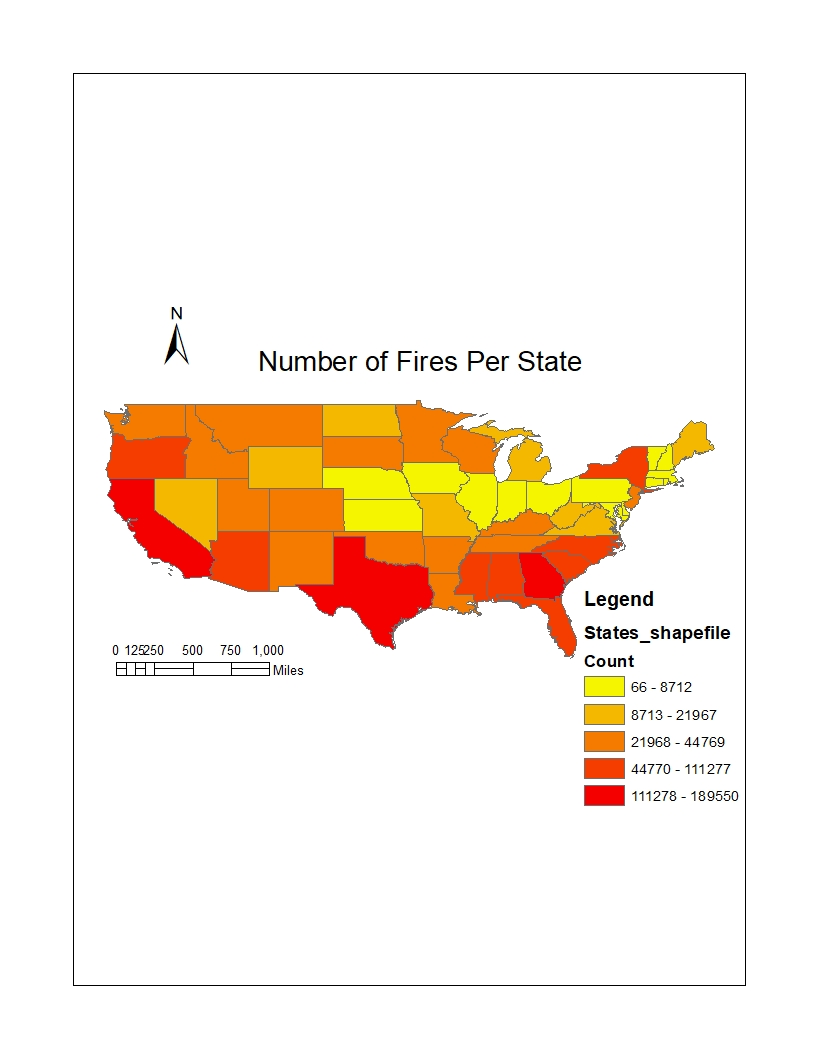

In [39]:
from IPython import display
display.Image(r"C:\Users\Devin\Desktop\Thinkful\capstone4\figures\fire_map1.jpg")

From first glance, it looks like the larger states generally seem to have more fires than smaller ones, as one would expect just due to sheer area alone. It also looks like states in the south have had more fires in them than their northern counterparts. Lets examine fires per area, that is a more appropriate metric to explore. 

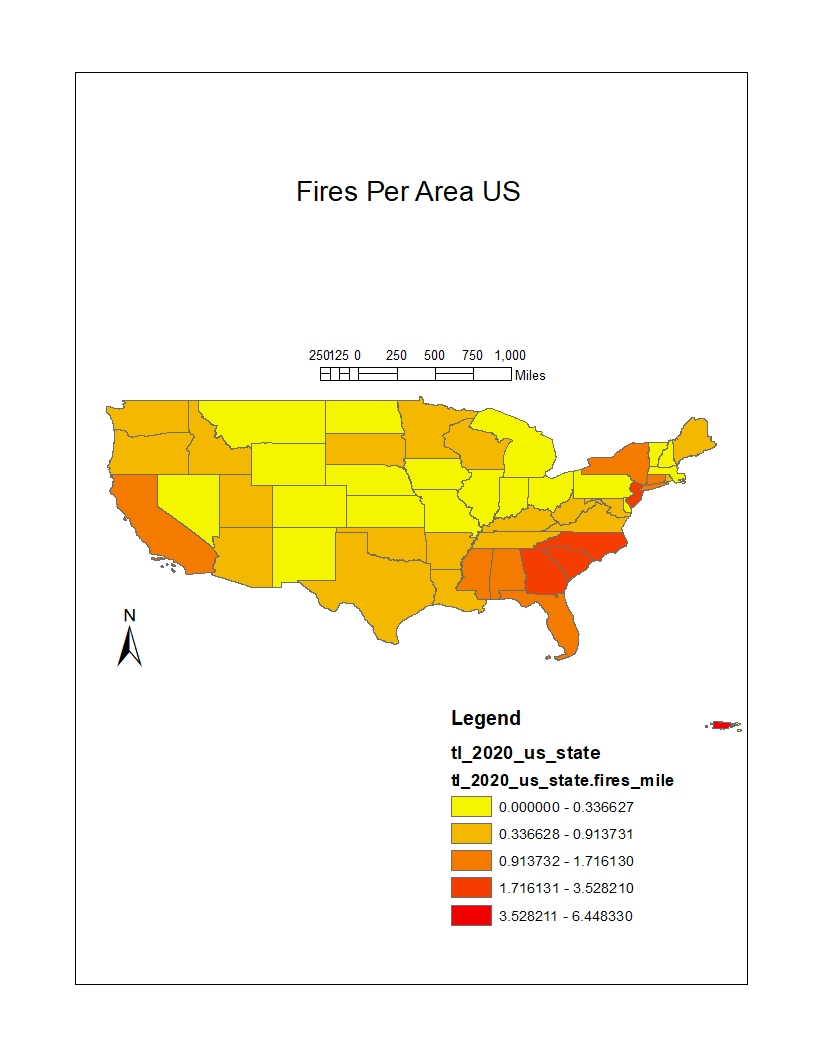

In [40]:
display.Image(r"C:\Users\Devin\Desktop\Thinkful\capstone4\figures\fire_area.jpg")

This is a bit surprsising. I was expecting that states known for their fires, such as California would be in the highest category. More urbanized states in the SE of the country have a much higher fire count per square mile than states known for their destructive fires. Lets look at California, and examine which counties had the most fires. It is likely that the more urban areas have a higher number of fires due to the large amount of people living there. More people equate to more chances for fires to start. 

Lets take a look at California. 

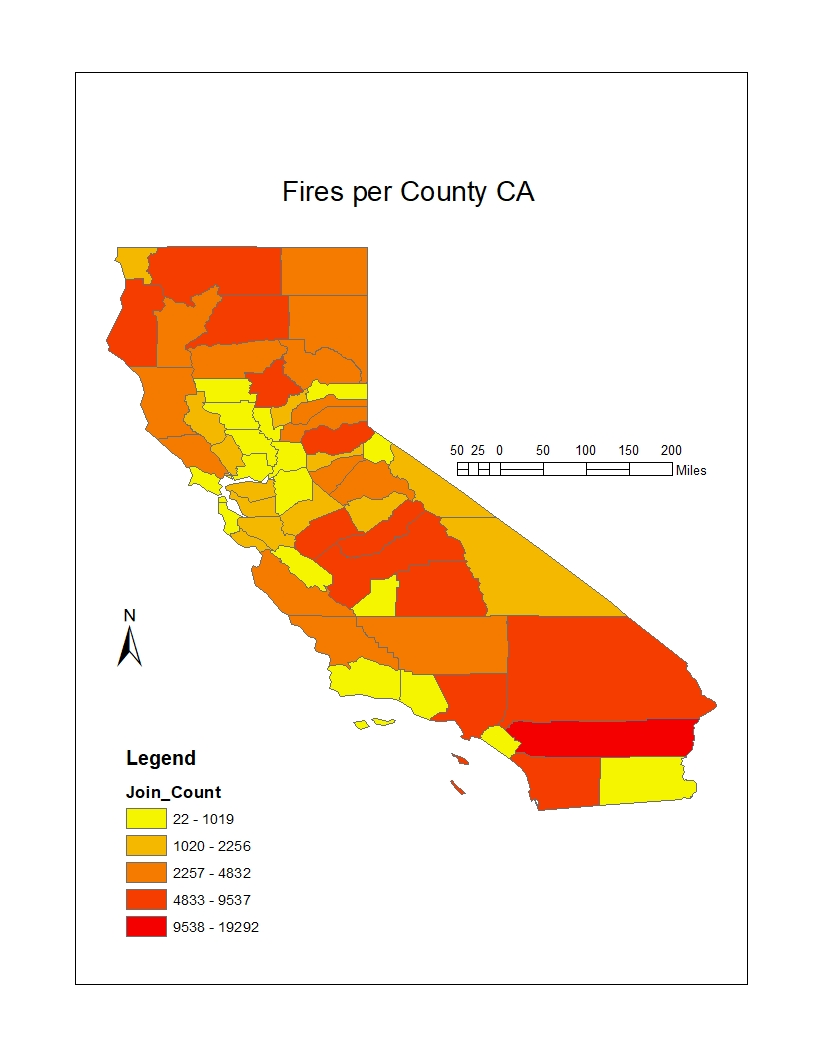

In [41]:
display.Image(r"C:\Users\Devin\Desktop\Thinkful\capstone4\figures\fires_per_county_Ca.jpg")

It seems that the more rural and larger counties had the highest number of fires. The northern counties, which are very forested and have limited developoment had a large number. Some of the southern central valley counties also had many fires. 

# Data Type errors 

There are some data types that need to be changed around. Lets do that prior to plotting. 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   OBJECTID            int64  
 1   SOURCE_SYSTEM_TYPE  object 
 2   FIRE_YEAR           int64  
 3   DISCOVERY_DOY       int64  
 4   DISCOVERY_TIME      object 
 5   STAT_CAUSE_DESCR    object 
 6   CONT_DOY            float64
 7   CONT_TIME           object 
 8   FIRE_SIZE           float64
 9   FIRE_SIZE_CLASS     object 
 10  LATITUDE            float64
 11  LONGITUDE           float64
 12  OWNER_DESCR         object 
 13  STATE               object 
 14  FIPS_CODE           object 
dtypes: float64(4), int64(3), object(8)
memory usage: 215.2+ MB


In [43]:
# change the data type of discovery time to numeric 
df['DISCOVERY_TIME']= pd.to_numeric(df['DISCOVERY_TIME'], downcast='integer')

In [44]:
# containment time is object, lets cast this to numeric 
df['CONT_TIME']= pd.to_numeric(df['CONT_TIME'], downcast='integer')

In [45]:
# encode this one, but after all data exploration is complete   
df['OWNER_DESCR'].value_counts()

MISSING/NOT SPECIFIED    1050835
PRIVATE                   314822
USFS                      188338
BIA                       106819
STATE OR PRIVATE           71881
BLM                        63278
STATE                      30790
NPS                        17524
FWS                        12191
TRIBAL                      8952
OTHER FEDERAL               6452
MUNICIPAL/LOCAL             4236
UNDEFINED FEDERAL           2206
COUNTY                      1841
BOR                          285
FOREIGN                       15
Name: OWNER_DESCR, dtype: int64

In [46]:
#encode after data exploration 
df['STAT_CAUSE_DESCR'].value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [47]:
# encode after data exploration 
df['SOURCE_SYSTEM_TYPE'].value_counts()

NONFED       1362148
FED           481106
INTERAGCY      37211
Name: SOURCE_SYSTEM_TYPE, dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   OBJECTID            int64  
 1   SOURCE_SYSTEM_TYPE  object 
 2   FIRE_YEAR           int64  
 3   DISCOVERY_DOY       int64  
 4   DISCOVERY_TIME      float64
 5   STAT_CAUSE_DESCR    object 
 6   CONT_DOY            float64
 7   CONT_TIME           float64
 8   FIRE_SIZE           float64
 9   FIRE_SIZE_CLASS     object 
 10  LATITUDE            float64
 11  LONGITUDE           float64
 12  OWNER_DESCR         object 
 13  STATE               object 
 14  FIPS_CODE           object 
dtypes: float64(6), int64(3), object(6)
memory usage: 215.2+ MB


# Missing Values

Those data types all look fine to me. Lets looks at missing values now  

In [49]:
# ok, we got a good number to handle here 
df.isna().sum()

OBJECTID                   0
SOURCE_SYSTEM_TYPE         0
FIRE_YEAR                  0
DISCOVERY_DOY              0
DISCOVERY_TIME        882638
STAT_CAUSE_DESCR           0
CONT_DOY              891531
CONT_TIME             972553
FIRE_SIZE                  0
FIRE_SIZE_CLASS            0
LATITUDE                   0
LONGITUDE                  0
OWNER_DESCR                0
STATE                      0
FIPS_CODE             678148
dtype: int64

In [50]:
#set the index 
df = df.set_index('OBJECTID')

In [51]:
df.head()

,SOURCE_SYSTEM_TYPE,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,FIPS_CODE
OBJECTID,,,,,,,,,,,,,,
1,FED,2005,33,1300.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,063
2,FED,2004,133,845.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,061
3,FED,2004,152,1921.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,017
4,FED,2004,180,1600.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,003
5,FED,2004,180,1600.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,003


The time ones can likely be imputed. But the FIPS_Code is actually a label. Imputing is not suitable in this case. 

In [52]:
#use sklearn's imputer with a median strategy 

df_pre_imputed = df[['DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME']]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

imputer.fit(df_pre_imputed)

X = imputer.transform(df_pre_imputed)

In [53]:
df_imputed = pd.DataFrame(X, columns= df_pre_imputed.columns, index = df.index)



In [54]:
df_imputed = df_imputed.set_index(df.index)

In [55]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880465 entries, 1 to 1880465
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DISCOVERY_TIME  float64
 1   CONT_DOY        float64
 2   CONT_TIME       float64
dtypes: float64(3)
memory usage: 57.4 MB


In [56]:
#join the imputed columns back in 
df = df.join(df_imputed, lsuffix='_caller', rsuffix='_other')

In [57]:
df.isna().sum()

SOURCE_SYSTEM_TYPE            0
FIRE_YEAR                     0
DISCOVERY_DOY                 0
DISCOVERY_TIME_caller    882638
STAT_CAUSE_DESCR              0
CONT_DOY_caller          891531
CONT_TIME_caller         972553
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_DESCR                   0
STATE                         0
FIPS_CODE                678148
DISCOVERY_TIME_other          0
CONT_DOY_other                0
CONT_TIME_other               0
dtype: int64

In [58]:
#drop columns with the unknown ones 
df.drop(['DISCOVERY_TIME_caller', 'CONT_DOY_caller', 'CONT_TIME_caller'], axis=1, inplace=True)

In [59]:
#rename to stay consistent
df.rename(columns ={'DISCOVERY_TIME_other':'DISCOVERY_TIME', 'CONT_DOY_other':'CONT_DOY', 'CONT_TIME_other':'CONT_TIME'}
                   ,inplace= True)

# EDA 

In [60]:
#build list of numeric columns 
numeric = ['FIRE_YEAR', 'DISCOVERY_DOY', 'DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'LATITUDE', 
          'LONGITUDE']

In [61]:
#build categorical list 
categorical = []
for i in df.columns:
    if i not in numeric:
        categorical.append(i)


In [62]:
#looks good 
categorical

['SOURCE_SYSTEM_TYPE',
 'STAT_CAUSE_DESCR',
 'FIRE_SIZE_CLASS',
 'OWNER_DESCR',
 'STATE',
 'FIPS_CODE']

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


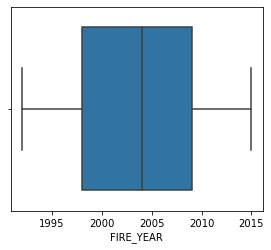

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


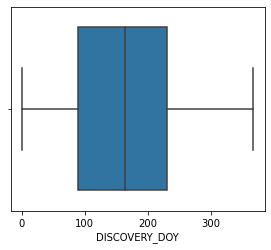

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


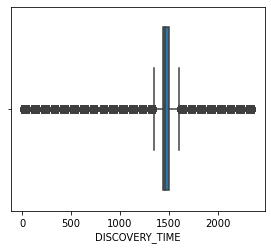

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


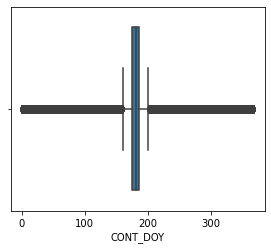

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


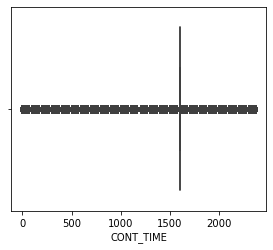

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


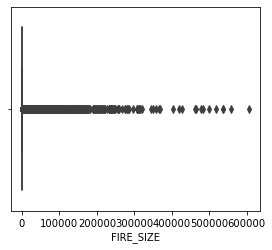

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


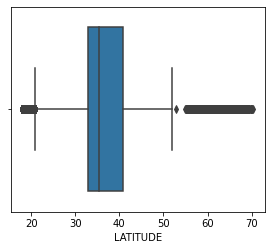

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


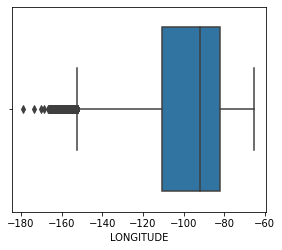

In [63]:
#plot all the numeric columns and examine their distribution 
import matplotlib.pyplot as plt 
import seaborn as sns

for v, i in enumerate(numeric):
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,(v + 1))
    sns.boxplot(df[i])
    plt.tight_layout()
    plt.show()

Looks like there is going to be some work to be done here. 

1. Fire Year- Looks good to me, normal distribution. 

2. Discovery Day - looks good as well. 

3. Discovery time- skewed off to the left. That would be as we would expect as few people are awake and able to discover a wildfire from midnight to 5am. 

4. Containment Day - normal distribution 

5. Containment time - same story as discovery time, skewed off to the left, but not terribly. 

6. Fire Size - very skewed off to the right, as one would expect. Very large fires are exceedingly rare. 

7 + 8. Latitude and Longitude - Both have some outliers. Might have to eliminate Alaska from the analysis, as it is the state that is giving all of the extreme values. 

9. Fips_code - another problematic one. This is actually a numeric representation of the name of the county. It might mess with the model, as it is in fact not ordnial. Label encoding is something to avoid.  

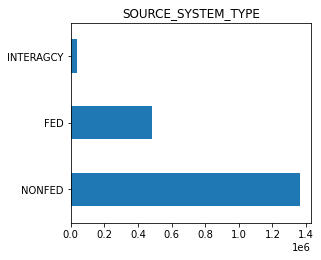

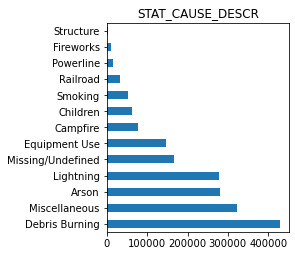

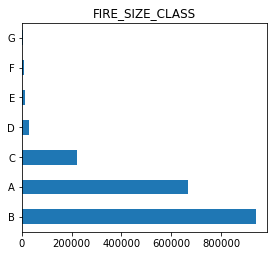

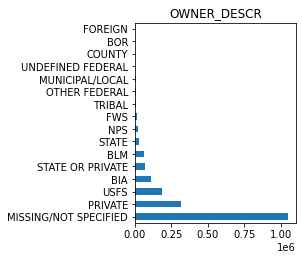

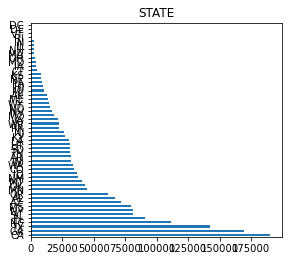

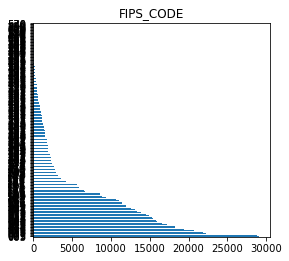

In [64]:
# now look at the categorical ones 
for v, i in enumerate(categorical):
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,(v + 1))
    df[i].value_counts().plot(kind='barh')
    plt.title(categorical[v])
    plt.tight_layout()
    plt.show()

Here are the disribtuion of all of these are not normal. This is as we would expect though. 

1. It seems that the majority of the data has came from non-federal databases . 

2. Some of the causes are much more common than others, as one would expect. 

3. Smaller fires are much more common than the very large ones. 

4. Lots of missing data as far as the description of the owner. Not much that can be done about this fact. 

5. State- as evident from the GIS exploration, some states have far more fires than others. 

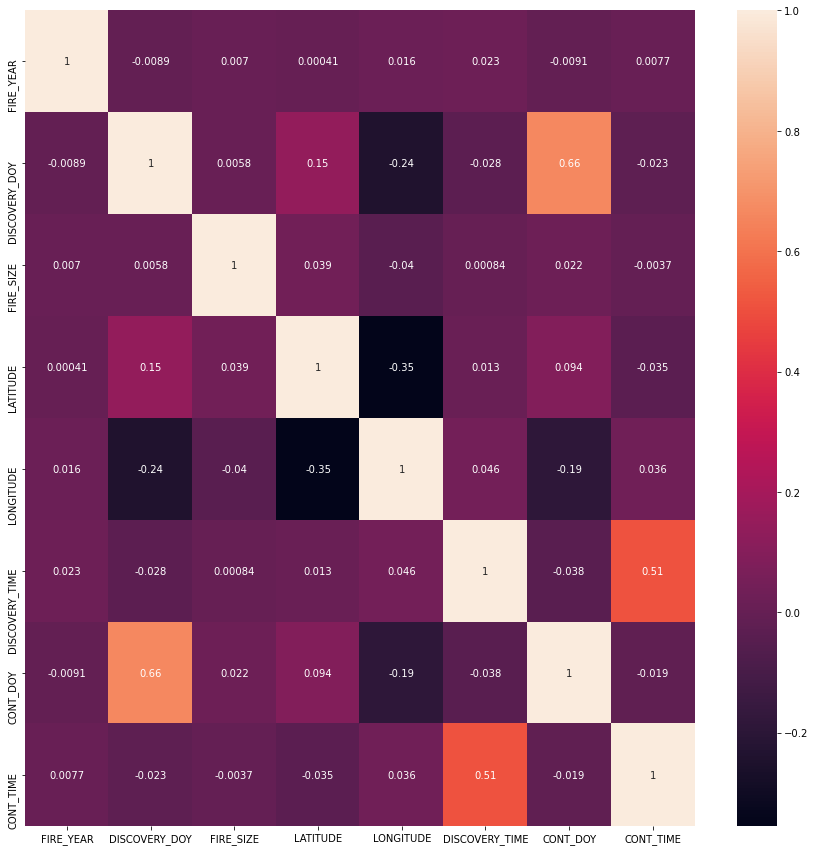

In [65]:
#build a correlation heatmap  
corr = df.corr()

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(corr, annot=True)
plt.show()


Looks like very weak correlation between the target and the features unfortunately. Predicting the size class feature seems like a more achievable goal, but it is probably best to limit the model to a particular state. Lets see what the heatmap looks like for a single state. 

 

In [66]:
# try just california 

filt = df['STATE'] == 'CA'
CA_DF = df.loc[filt]

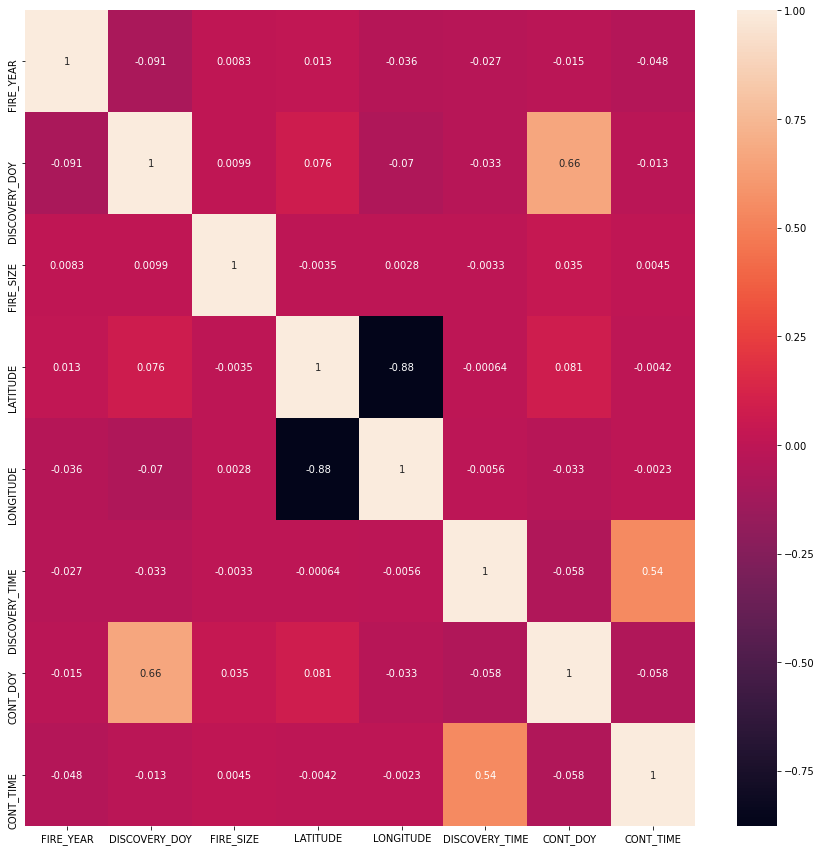

In [67]:
CA_corr = CA_DF.corr()

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(CA_corr, annot=True)
plt.show()

California is not looking much better. Lets compare the full dataset to California. 

In [68]:
#compare correlation of the 2 
print('all states:', abs(corr['FIRE_SIZE']).sum())
print('California:', abs(CA_corr['FIRE_SIZE']).sum())

#The california dataframe has a lower overall corelation to the target than the entire DF
# lets look at correlation of each individual state 

all states: 1.117654865927604
California: 1.0676433526457887


In [69]:
state = ['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI']

In [70]:
# proud of this code
#compare the absolute value of the sum of correlation values of every state 

for i, s in enumerate(state):
    filt = df['STATE'] == str(s)
    state_df = df.loc[filt]
    state_corr = state_df.corr()
    print(state[i], abs(state_corr['FIRE_SIZE'].sum()))
    

CA 1.0539615267887288
NM 0.9719427082162305
OR 1.0599017575491592
NC 1.0141813034271288
WY 1.1067964420960816
CO 1.009197054035415
WA 1.096842122311238
MT 1.0846794617067599
UT 0.985772421406348
AZ 1.0078985826044626
SD 1.0374336488077032
AR 1.012789072289364
NV 1.106061296412489
ID 1.0766955495314812
MN 1.0369183220459008
TX 0.9549594712959066
FL 0.9856627270920671
SC 0.9888941994995841
LA 0.8220172460022747
OK 0.9207575059953645
KS 0.6661359728987862
MO 0.8882700513446053
NE 0.9876491346726732
MI 1.0383018185716493
KY 1.036879237291826
OH 0.8481492747005533
IN 1.0153724064062706
VA 1.0071259924226414
IL 0.9749279115361844
TN 1.1787647370854972
GA 1.0076683987621096
AK 1.30380329775745
ND 0.9655812964096563
WV 0.9524591647897082
WI 0.9760657328157515
AL 0.9486575998118567
NH 0.9356856493362394
PA 1.0005153735058612
MS 0.9309769443476038
ME 1.003690948898882
VT 0.8680355475607076
NY 0.960061236050053
IA 0.8574241668337154
DC 0.7942335165962539
MD 0.3995847994307625
CT 0.902326024280512

Alaska and Delaware have the highest correlation. Lets examine both of them in more detail and see if it is possible to build a model for either one of them. 


In [71]:
# only 171 replicates, not enough to build a model 
(df['STATE'] == 'DE').value_counts()

False    1880294
True         171
Name: STATE, dtype: int64

In [72]:
# that is more like it, I think that should be enough for a model 
(df['STATE'] == 'AK').value_counts()

False    1867622
True       12843
Name: STATE, dtype: int64

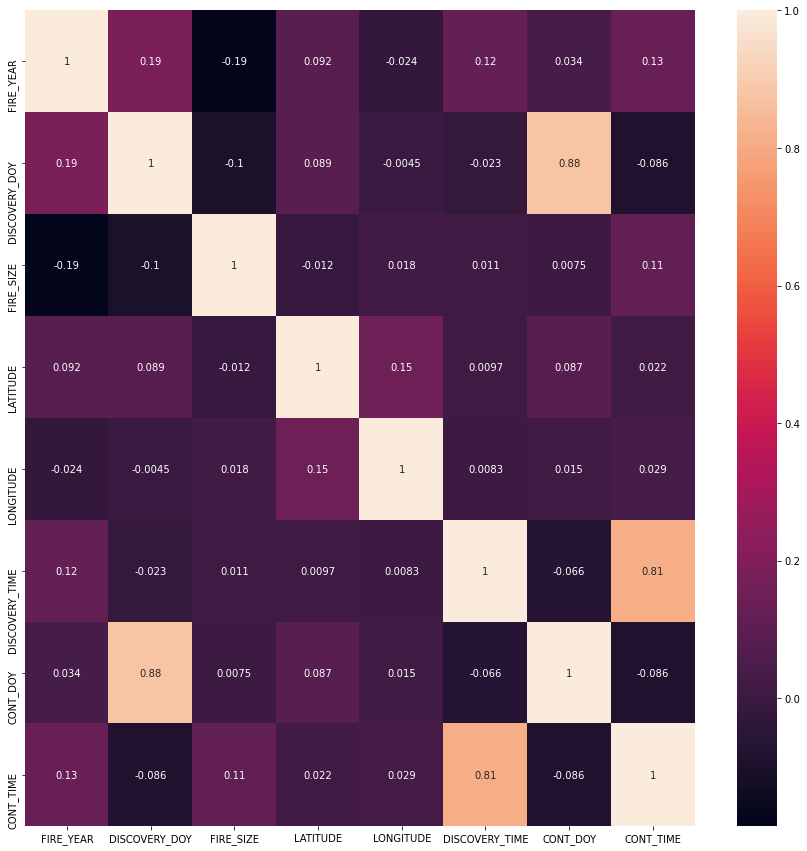

In [73]:
# look at just AK 
filt = df['STATE'] == 'AK'
AK_df = df.loc[filt]
AK_corr = state_df.corr()

fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(state_corr, annot=True)
plt.show()

This looks like the best we are going to do. Alaska has the highest correlation in relation to the fire size category, while still having enough replicates to fit a model. The model I build will filter down to just the state of Alaska. 

In [74]:
#that will be encodable. will have to be changed back to an object as it is a label and not ordinal 
AK_df['FIPS_CODE'].nunique()

15

# Further Exploration of Just Alaska



C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


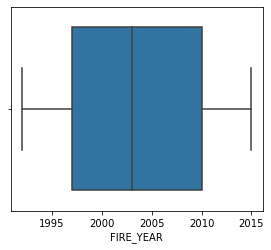

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


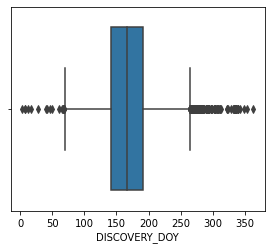

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


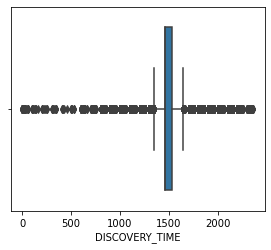

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


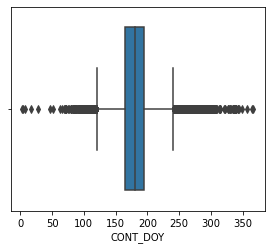

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


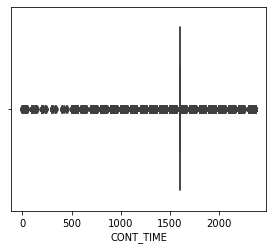

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


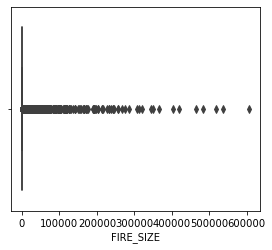

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


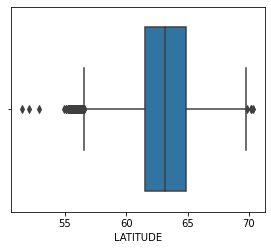

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


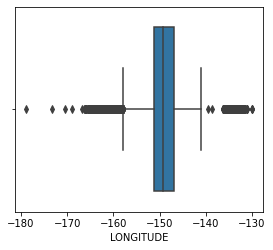

In [75]:
for v, i in enumerate(numeric):
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,(v + 1))
    sns.boxplot(AK_df[i])
    plt.tight_layout()
    plt.show()

In [76]:
# ok I am thinking of just dropping the fire size column and predicting the class.
# seems like that would be a much more acheiveable goal than predicting exact size 

In [77]:
#winsorize the ones with unsavory distributions 
from scipy.stats.mstats import winsorize

for i in [1, 2, 3, 4, 6, 7]:
    AK_df[numeric[i]] = winsorize(AK_df[numeric[i]], (0.10, 0.10))
    

<ipython-input-77-f49e0ae05f55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AK_df[numeric[i]] = winsorize(AK_df[numeric[i]], (0.10, 0.10))


C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


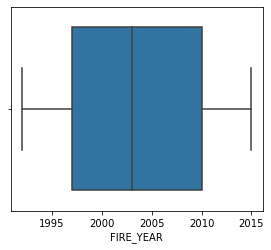

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


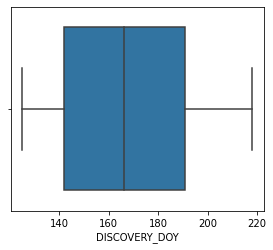

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


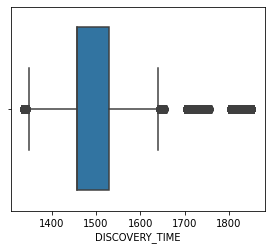

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


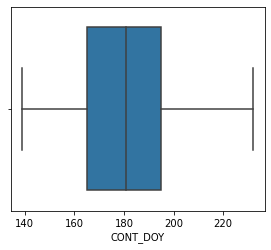

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


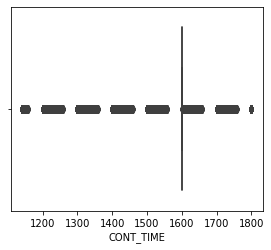

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


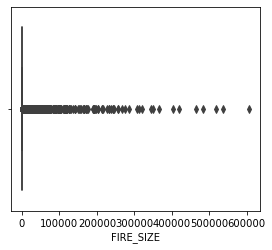

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


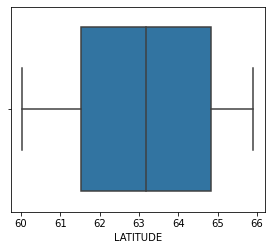

C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


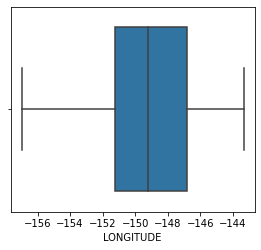

In [78]:
# look at them again 
for v, i in enumerate(numeric):
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,(v + 1))
    sns.boxplot(AK_df[i])
    plt.tight_layout()
    plt.show()

In [79]:
# ok, that looks better. But DISCO_TIME and CONT_TIME still need work 

C:\Users\Devin\CONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONT_TIME', ylabel='Density'>

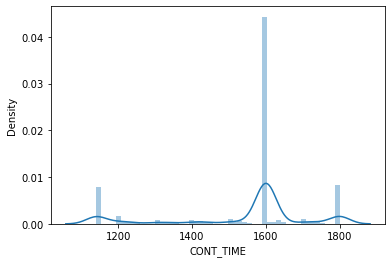

In [80]:
sns.distplot(AK_df['CONT_TIME']) # just going to have to live with it, it just has such a strange distribution 
# after the imputation. I can't get it normal 

C:\Users\Devin\CONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DISCOVERY_TIME', ylabel='Density'>

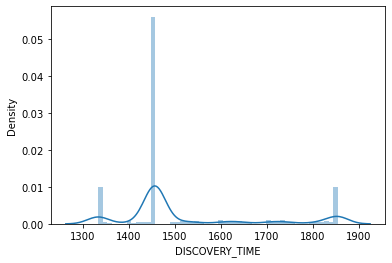

In [81]:
# I think we will just have to live with this as is as well. 
sns.distplot(AK_df['DISCOVERY_TIME'])

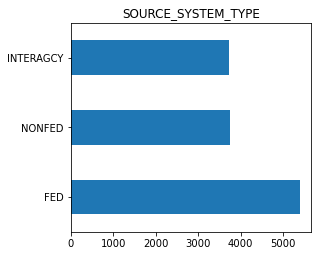

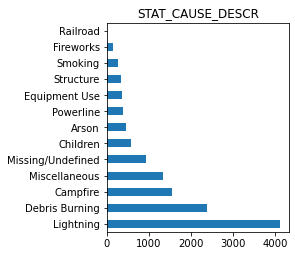

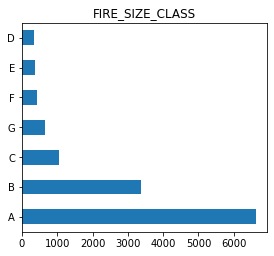

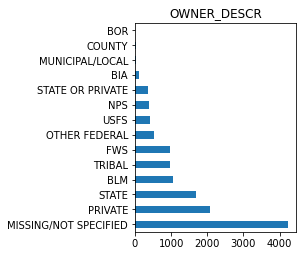

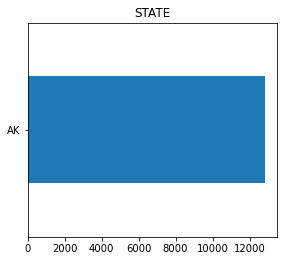

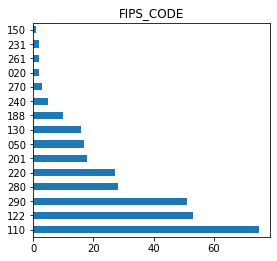

In [82]:
# now look at the categorical ones 
for v, i in enumerate(categorical):
    plt.figure(figsize=(15,10))
    plt.subplot(3,4,(v + 1))
    AK_df[i].value_counts().plot(kind='barh')
    plt.title(categorical[v])
    plt.tight_layout()
    plt.show()

Much different story here than the main dataset. Seems that the cause of fire is primairly lightning. Categorical distributions seem a bit more balanced in areas here than the main dataset. The Fire_Size_Class must be changed around though. I need a more balanced distribution for the target.  

As it currently stands:

FIRESIZECLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres)

In [83]:
AK_df['FIRE_SIZE'].value_counts()

0.1        5930
0.2         669
0.3         605
0.5         550
1.0         480
           ... 
34851.4       1
409.6         1
18610.0       1
62658.1       1
1543.0        1
Name: FIRE_SIZE, Length: 1821, dtype: int64

In [84]:
# try to even it out a bit more 
#0 class 0 - 0.1 size 
#1 class > 0.1 to 0.5
#2 class > 0.5 to 1  
#3 class > 1 to 5 
#4 class > 5 to 10 
#5 class > 10 to 50 
#6 class > 100 

y_class = pd.cut(
    AK_df['FIRE_SIZE'],
    [0, 0.1, 0.5, 1, 5, 10, 50, np.inf ],
    labels=['0', '1', '2', '3', '4', '5', '6']
)

<AxesSubplot:>

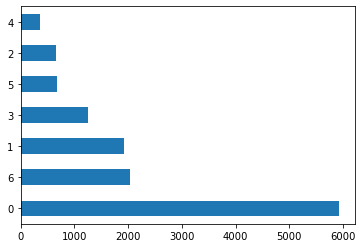

In [85]:
# looks a bit better.. I Think it is the best we can do 
y_class.value_counts().plot(kind='barh')

In [86]:
AK_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12843 entries, 4624 to 1856892
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SOURCE_SYSTEM_TYPE  12843 non-null  object 
 1   FIRE_YEAR           12843 non-null  int64  
 2   DISCOVERY_DOY       12843 non-null  int64  
 3   STAT_CAUSE_DESCR    12843 non-null  object 
 4   FIRE_SIZE           12843 non-null  float64
 5   FIRE_SIZE_CLASS     12843 non-null  object 
 6   LATITUDE            12843 non-null  float64
 7   LONGITUDE           12843 non-null  float64
 8   OWNER_DESCR         12843 non-null  object 
 9   STATE               12843 non-null  object 
 10  FIPS_CODE           310 non-null    object 
 11  DISCOVERY_TIME      12843 non-null  float64
 12  CONT_DOY            12843 non-null  float64
 13  CONT_TIME           12843 non-null  float64
dtypes: float64(6), int64(2), object(6)
memory usage: 1.5+ MB


In [87]:
AK_df['FIPS_CODE'].value_counts()

110    75
122    53
290    51
280    28
220    27
201    18
050    17
130    16
188    10
240     5
270     3
020     2
261     2
231     2
150     1
Name: FIPS_CODE, dtype: int64

In [88]:
# ok now just fill na to a random value for misc 
AK_df['FIPS_CODE'].fillna(0, inplace=True)


C:\Users\Devin\CONDA\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [89]:
# ok looks good. 
AK_df['FIPS_CODE'].isna().sum()

0

# Encoding and Scaling of Alaska Dataset 

Time to encode and scale the Alaska dataset. Lets try some unsupervised learning and a supervised learning model. I tried doing some unsupervised learning on the main dataset, but I do not have enough computer memory to accomplish such a massive task. 

In [90]:
cat_AK = AK_df[['SOURCE_SYSTEM_TYPE', 'STAT_CAUSE_DESCR', 'OWNER_DESCR',  'FIPS_CODE']]

In [91]:
cat_AK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12843 entries, 4624 to 1856892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SOURCE_SYSTEM_TYPE  12843 non-null  object
 1   STAT_CAUSE_DESCR    12843 non-null  object
 2   OWNER_DESCR         12843 non-null  object
 3   FIPS_CODE           12843 non-null  object
dtypes: object(4)
memory usage: 501.7+ KB


In [92]:
cat_AK = cat_AK.astype('str')

In [93]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder()

AK_encoded = encoder.fit_transform(cat_AK)

# now put this to array 
AK_encoded = AK_encoded.toarray()

# now to data frame
AK_encoded = pd.DataFrame(AK_encoded)


In [94]:
#drop the categorical columns from df 

AK_df.drop(columns=['SOURCE_SYSTEM_TYPE','STAT_CAUSE_DESCR','FIRE_SIZE_CLASS','OWNER_DESCR','STATE','FIPS_CODE'],
       inplace=True)

C:\Users\Devin\CONDA\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [95]:
# now scale the features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(AK_df)

AK_df = scaler.fit_transform(AK_df)

AK_df = pd.DataFrame(AK_df, columns=numeric)

In [96]:
# ok, need a common column to perform the merge, use the index  

AK_df['index_key'] = AK_df.index

AK_encoded['index_key'] = AK_df.index

In [97]:
AK_df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,index_key
0,0.243123,-1.427448,-0.127933,-1.492106,-0.014102,-1.214585,-1.581569,1.385701,0
1,0.243123,-1.427448,-0.127469,-1.264911,1.018858,2.182951,-1.581569,-1.179752,1
2,0.243123,-1.327520,-0.127923,-1.074793,0.085509,1.271734,-1.581569,1.385701,2
3,0.243123,-1.294211,-0.128046,-1.086501,0.098118,-1.214585,-1.581569,-2.211391,3
4,0.243123,0.304633,-0.128040,-1.502409,1.520165,-0.127634,-0.144953,-0.088070,4


In [98]:
AK_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,index_key
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [99]:
#now add the encoded features to the imputed data frame 
 

merged = AK_df.join(AK_encoded, lsuffix='_caller', rsuffix='_other')


In [100]:
merged.drop(columns=['index_key_caller', 'index_key_other'], inplace=True)

In [101]:
merged.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,0,1,...,36,37,38,39,40,41,42,43,44,45
0,0.243123,-1.427448,-0.127933,-1.492106,-0.014102,-1.214585,-1.581569,1.385701,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.243123,-1.427448,-0.127469,-1.264911,1.018858,2.182951,-1.581569,-1.179752,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.243123,-1.327520,-0.127923,-1.074793,0.085509,1.271734,-1.581569,1.385701,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.243123,-1.294211,-0.128046,-1.086501,0.098118,-1.214585,-1.581569,-2.211391,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.243123,0.304633,-0.128040,-1.502409,1.520165,-0.127634,-0.144953,-0.088070,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
# drop index key from ak df for later 

AK_df.drop(columns='index_key', inplace=True)

# Unsupervised learning Time 

In [103]:
# adapted this function from the umap documentation 

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(merged);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)

C:\Users\Devin\CONDA\lib\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


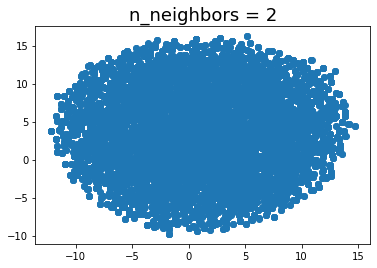

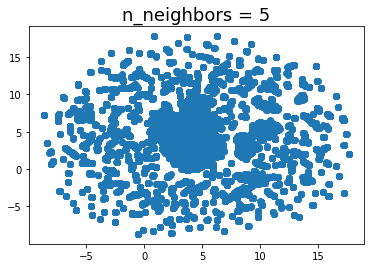

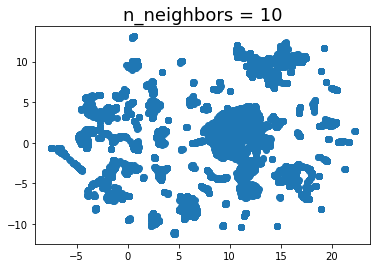

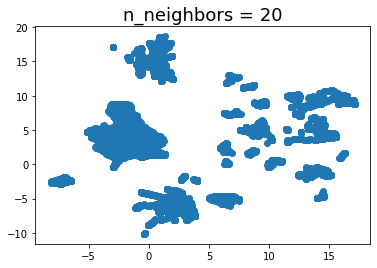

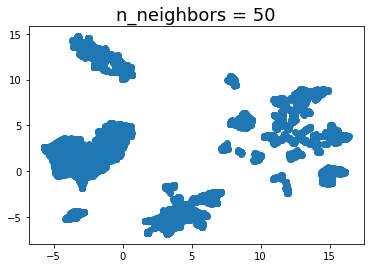

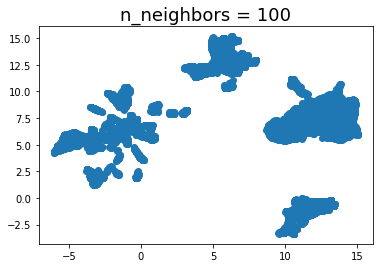

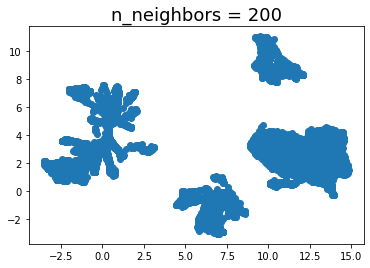

In [104]:
import umap.umap_ as umap

for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [105]:
# number of neighbors = 100 looks the best 

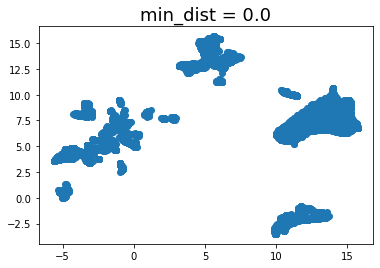

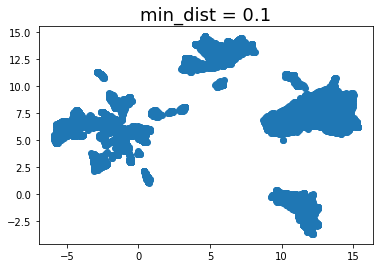

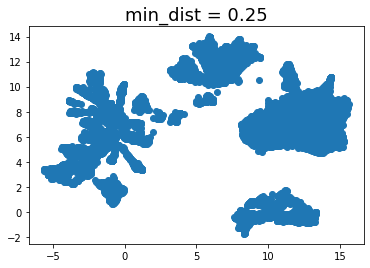

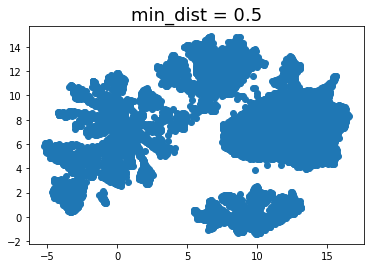

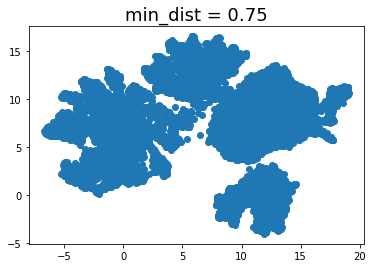

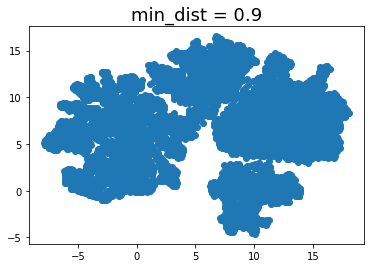

In [106]:
for d in (0.0, 0.1, 0.25, 0.5, 0.75, 0.90):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d),n_neighbors=100 )

We have a pretty solid looking visualization. Lets look at how kmeans performs. 

In [107]:
# min_dist = 0.1 is best 
# save results 

umap_results = umap.UMAP(n_neighbors=100, min_dist = 0.1, metric ='correlation').fit_transform(merged)

<AxesSubplot:>

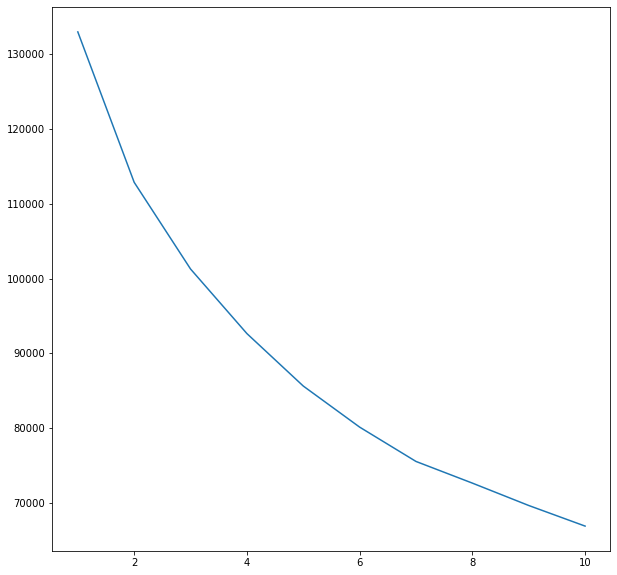

In [108]:
from sklearn.cluster import KMeans
from sklearn import metrics 

#start with an inertia plot straight away, lets find the best number of groups 

clusters = []

for v in range(1, 11):
    km = KMeans(n_clusters=v).fit(merged)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)



C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of Alaska Fire dataset k_means')

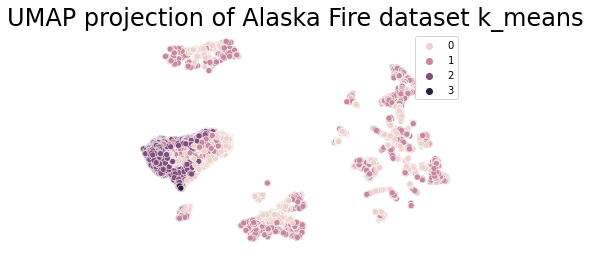

In [109]:
# pretty gradual, but it seems that 4 or 6 is the best elbow point 

#fit model k = 4 
k_means = KMeans(n_clusters = 4)
k_means.fit(merged)

#now plot it 
sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], k_means.labels_)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of Alaska Fire dataset k_means', fontsize=24)

In [110]:
# get the silhoutte score of the model 

print(metrics.silhouette_score(merged,k_means.labels_))

0.1631892150663718


That doesn't look so great. All of the groups are intertwined. 

In [111]:
from sklearn.cluster import DBSCAN

# Defining the model
dbscan_cluster = DBSCAN(eps=3, min_samples=10)

# Fit model
clusters = dbscan_cluster.fit(merged)



C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of Alaska Fire dataset k_means')

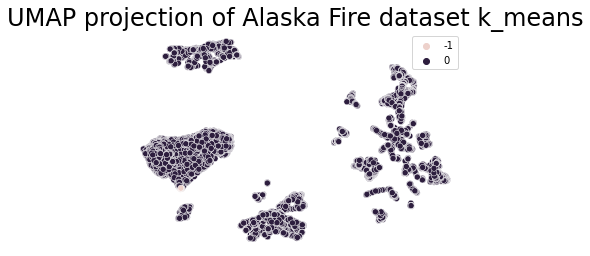

In [112]:
#now plot it 
sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], clusters.labels_)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of Alaska Fire dataset k_means', fontsize=24)

DBscan just found one single group. Lets look at some different values and see how it looks. 

In [113]:
# get silhoutte score for different min_sample values 

min_samp = list(range(5,205,50))


for i in min_samp:
    print('min sample value is :' + str(i))
    db = DBSCAN(eps = 3, min_samples = i).fit(merged)
    print(metrics.silhouette_score(merged, db.labels_))

min sample value is :5
0.7689730628361536
min sample value is :55
0.6301377255857871
min sample value is :105
0.6025204732019893
min sample value is :155
0.5918079570983248


In [114]:
#get silhoutte scores for different epsilon values 
eps_values = np.arange(0.25, 10.25, 1)


for i in eps_values:
    try:
        print('min sample value is :' + str(i))
        db = DBSCAN(eps = i, min_samples = 7).fit(merged)
        print(metrics.silhouette_score(merged, db.labels_))
    except:
        print('value error number of labels')
        pass

min sample value is :0.25
-0.3114124123813453
min sample value is :1.25
-0.13233837168238877
min sample value is :2.25
0.5391314366178445
min sample value is :3.25
0.7767109808910712
min sample value is :4.25
0.8299092725403715
min sample value is :5.25
0.843545382681744
min sample value is :6.25
0.8481734240192261
min sample value is :7.25
value error number of labels
min sample value is :8.25
value error number of labels
min sample value is :9.25
value error number of labels


In [115]:
# Defining the model
dbscan_cluster = DBSCAN(eps=2.25, min_samples=50)

# Fit model
clusters = dbscan_cluster.fit(merged)



C:\Users\Devin\CONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'UMAP projection of Alaska Fire dataset k_means')

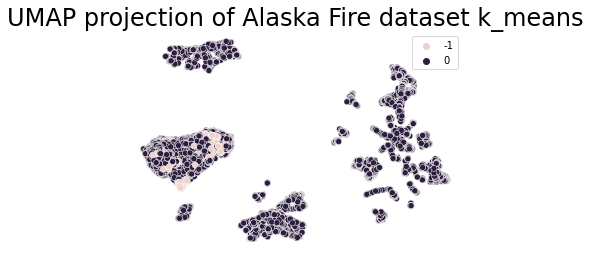

In [116]:
#now plot it 
sns.scatterplot(
    umap_results[:, 0],
    umap_results[:, 1], clusters.labels_)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('UMAP projection of Alaska Fire dataset k_means', fontsize=24)

I don't think that DBSCAN is producing useful results. Seems to just be grouping it all into one large group, with a few outliers. K-means seemed to produce slightly better results, but it still seems that there isn't any compeling trends that unsupervised learning is discovering here. 

Let move on to supervised learning and see if we can predict the size class of a fire based on the features. 

# Supervised Learning 

In [117]:
merged.columns

Index([     'FIRE_YEAR',  'DISCOVERY_DOY', 'DISCOVERY_TIME',       'CONT_DOY',
            'CONT_TIME',      'FIRE_SIZE',       'LATITUDE',      'LONGITUDE',
                      0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,               33,               34,               35,
                     36,               37,               38,               39,
                     40,               41,          

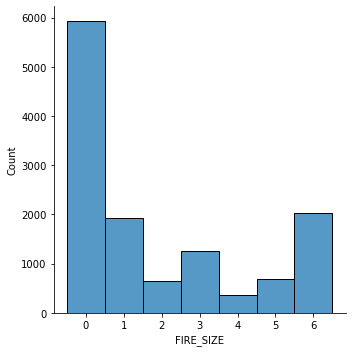

In [118]:
sns.displot(y_class)

Target class distribution looks a lot better than earlier. The 0.1 value is very common unfortunately and accounts for the high count in the 0 class. 

In [119]:
# split up X, get rid of the target 

X = merged.drop(columns=['FIRE_SIZE'])

In [120]:
#split up the X and y 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, shuffle = True, stratify = y_class)

In [121]:
#first try the RFC model, a strong performing classifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()

scores = cross_val_score(rfc, X, y_class, scoring = 'neg_mean_squared_error', cv=5)

scores = np.sqrt(-scores)

In [122]:
#very eratic performance, thats unfortunate 

scores

array([0.79041553, 0.48648532, 0.78696069, 0.58004189, 1.28084984])

In [123]:
# just try the score of the train test split 

rfc.fit(x_train, y_train)

rfc.score(x_test, y_test)

#performance seems solid, but model is eratic 

0.9433198380566802

In [124]:
# get an idea of feature importance 
importance = rfc.feature_importances_

cols = np.array(merged.columns)

for i,v in zip(cols,importance):
    try:
        print('feature name: ',i, '||||||||', 'Importance: ',v)
    except:
        pass

feature name:  FIRE_YEAR |||||||| Importance:  0.037320852882498014
feature name:  DISCOVERY_DOY |||||||| Importance:  0.0492495020366883
feature name:  DISCOVERY_TIME |||||||| Importance:  0.5799653812436482
feature name:  CONT_DOY |||||||| Importance:  0.06194665684688227
feature name:  CONT_TIME |||||||| Importance:  0.06892814537059194
feature name:  FIRE_SIZE |||||||| Importance:  0.04593873139247915
feature name:  LATITUDE |||||||| Importance:  0.023312701704955537
feature name:  LONGITUDE |||||||| Importance:  0.015938404662149405
feature name:  0 |||||||| Importance:  0.0047994527477912795
feature name:  1 |||||||| Importance:  0.0026988214206865122
feature name:  2 |||||||| Importance:  0.001954872964206548
feature name:  3 |||||||| Importance:  0.004832266782373453
feature name:  4 |||||||| Importance:  0.0015855507045818371
feature name:  5 |||||||| Importance:  0.004002890228476111
feature name:  6 |||||||| Importance:  0.0018444454068734075
feature name:  7 |||||||| Import

In [125]:
# encoded columns are not very important 
#try with just the AK_df continuous values and see if it is less eratic  

scores = cross_val_score(rfc, AK_df, y_class, scoring = 'neg_mean_squared_error', cv=5)

In [126]:
-scores

array([0.10237446, 0.0206306 , 0.02608019, 0.0241433 , 0.55023364])

In [127]:
# Still eratic with much worse performance
# try no CONT_TIME, most eratic feature 
X_NO_CONT_TIME = AK_df.copy()

X_NO_CONT_TIME.drop(columns='CONT_TIME', inplace=True)

In [128]:
scores = cross_val_score(rfc, X_NO_CONT_TIME, y_class, scoring = 'neg_mean_squared_error', cv=5)
-scores

array([0.0626703 , 0.00661736, 0.01401323, 0.01596573, 0.32866044])

Still highly eratic. 

Try main dataset with no CONT_TIME or DISCOVERY_TIME , the most poorly distributed features

In [133]:
X_Minus_2 = X.copy()

X_Minus_2.drop(columns=['CONT_TIME','DISCOVERY_TIME'], inplace=True)

In [134]:
scores = cross_val_score(rfc, X_Minus_2, y_class, scoring = 'neg_mean_squared_error', cv=5)
-scores

array([6.08018684, 5.20358116, 5.03659011, 4.61487539, 5.78816199])

In [135]:
# Very eratic. Lets try a different model type, support vector classifier 

from sklearn.svm import SVC 

svc = SVC()

scores = cross_val_score(svc, X, y_class, scoring = 'neg_mean_squared_error', cv=5)

In [136]:
# that is no better 
-scores

array([4.47995329, 3.20980926, 3.91124951, 3.78543614, 4.67250779])

In [138]:
from sklearn.tree import DecisionTreeClassifier 

treeclass = DecisionTreeClassifier()

scores = cross_val_score(svc, X, y_class, scoring = 'neg_mean_squared_error', cv=5)

In [139]:
#also no good. Lets try some ANNs
-scores

array([4.47995329, 3.20980926, 3.91124951, 3.78543614, 4.67250779])

Accuracy is not as important as precision in this case. Although some of these models have a high percieved accuracy, that is just by chance. They will not be accurate once they are exposed to outside data. I would much rather have low accuracy with high precison than high accuracy with low precision. None of these models are suitable as a final product. Lets try some ANNs and see how they work. 

# ANNs 

In [140]:
# try a dnn 

from tensorflow.keras.layers import Dense
from tensorflow.keras import losses 
from tensorflow.keras.models import Sequential 


#build the model object 
model = Sequential()

#first dense layer 
model.add(Dense(53, input_shape=(53,), activation='tanh'))

# the second dense layer 
model.add(Dense(64, activation='tanh'))

#last layer is the output layer 
model.add(Dense(7, activation = 'softmax'))

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 53)                2862      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3456      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 6,773
Trainable params: 6,773
Non-trainable params: 0
_________________________________________________________________


In [142]:
#compile the model, need to define optimizer, loss function, metric to measure performance 

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [152]:
# one hot encode the target variable using the to_categorical function from the keras.utils

from tensorflow.keras.utils import to_categorical 

y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [153]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
# fit the model 
model.fit(x_train, y_train, epochs=20, verbose =1)

Epoch 1/20
  7/301 [..............................] - ETA: 2s - loss: 1.9091 - accuracy: 0.1827 

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


301/301 [==============================] - 3s 9ms/step - loss: 1.4246 - accuracy: 0.4698
Epoch 2/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2727 - accuracy: 0.5741
Epoch 3/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2471 - accuracy: 0.5794
Epoch 4/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2331 - accuracy: 0.5735
Epoch 5/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2240 - accuracy: 0.5835
Epoch 6/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2171 - accuracy: 0.5719
Epoch 7/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2127 - accuracy: 0.5814
Epoch 8/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2087 - accuracy: 0.5783
Epoch 9/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2052 - accuracy: 0.5736
Epoch 10/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2023 - accuracy: 0.5895
Epoch 11/2

In [154]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('test score :', score[0])
print('test accuracy :', score[1])

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


test score : 1.1993581056594849
test accuracy : 0.5845531225204468


Not bad, lets try a different activation function. 

In [155]:
#build the model object 
model2 = Sequential()

#first dense layer 
model2.add(Dense(53, input_shape=(53,), activation='relu'))

# the second dense layer 
model2.add(Dense(64, activation='relu'))

#last layer is the output layer 
model2.add(Dense(7, activation = 'softmax'))

In [156]:
#compile the model, need to define optimizer, loss function, metric to measure performance 

model2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [157]:
tf.config.run_functions_eagerly(True)
# fit the model 
model2.fit(x_train, y_train, epochs=20, verbose =1)

Epoch 1/20
 13/301 [>.............................] - ETA: 2s - loss: 1.8680 - accuracy: 0.2349

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


301/301 [==============================] - 3s 8ms/step - loss: 1.6278 - accuracy: 0.4374
Epoch 2/20
301/301 [==============================] - 2s 8ms/step - loss: 1.3440 - accuracy: 0.5618
Epoch 3/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2883 - accuracy: 0.5652
Epoch 4/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2525 - accuracy: 0.5791
Epoch 5/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2529 - accuracy: 0.5694
Epoch 6/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2344 - accuracy: 0.5730: 0s - loss:
Epoch 7/20
301/301 [==============================] - 3s 10ms/step - loss: 1.2122 - accuracy: 0.5810
Epoch 8/20
301/301 [==============================] - 3s 11ms/step - loss: 1.2199 - accuracy: 0.5776
Epoch 9/20
301/301 [==============================] - 3s 10ms/step - loss: 1.2092 - accuracy: 0.5790
Epoch 10/20
301/301 [==============================] - 2s 8ms/step - loss: 1.1883 - accuracy: 0.

In [158]:
score = model2.evaluate(x_test, y_test, verbose = 0)
print('test score :', score[0])
print('test accuracy :', score[1])

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


test score : 1.1874583959579468
test accuracy : 0.591093122959137


Slightly better performance than the previous model. 

In [159]:
#build the model object 
model3 = Sequential()

#first dense layer 
model3.add(Dense(53, input_shape=(53,), activation='relu'))

# the second dense layer 
model3.add(Dense(64, activation='relu'))

#last layer is the output layer 
model3.add(Dense(7, activation = 'softmax'))

In [160]:
#compile the model, need to define optimizer, loss function, metric to measure performance 

model3.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [161]:
tf.config.run_functions_eagerly(True)
# fit the model 
model3.fit(x_train, y_train, epochs=20, verbose =1)

Epoch 1/20
 13/301 [>.............................] - ETA: 2s - loss: 1.9328 - accuracy: 0.1346

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


301/301 [==============================] - 3s 9ms/step - loss: 1.6799 - accuracy: 0.4319
Epoch 2/20
301/301 [==============================] - 3s 9ms/step - loss: 1.3260 - accuracy: 0.5709
Epoch 3/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2853 - accuracy: 0.5701
Epoch 4/20
301/301 [==============================] - 2s 8ms/step - loss: 1.2466 - accuracy: 0.5758
Epoch 5/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2270 - accuracy: 0.5793
Epoch 6/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2182 - accuracy: 0.5826
Epoch 7/20
301/301 [==============================] - 3s 8ms/step - loss: 1.2179 - accuracy: 0.5754
Epoch 8/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1952 - accuracy: 0.5846
Epoch 9/20
301/301 [==============================] - 3s 9ms/step - loss: 1.2077 - accuracy: 0.5831
Epoch 10/20
301/301 [==============================] - 3s 8ms/step - loss: 1.1855 - accuracy: 0.5911
Epoch 11/2

In [164]:
score = model3.evaluate(x_test, y_test, verbose = 0)
print('test score :', score[0])
print('test accuracy :', score[1])

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


test score : 1.1891034841537476
test accuracy : 0.5895359516143799


Model 2 is the top performer of all the models tested. I have tried performing cross validation with the ANNs, but do not know how to get this to work. There is no offical function, and despite my best efforts to define one, I cannot get it to work. I will implement this more manually by performing multiple split train tests while shuffling the data. This will test the precision of the model.  

In [175]:
#try another split train test and evaluate performance of model 2 

x2_train, x2_test, y2_train, y2_test = train_test_split(X, 
                                                        y_class, test_size = 0.25, shuffle = True, stratify = y_class)

In [176]:
y2_train = to_categorical(y2_train, 7)
y2_test = to_categorical(y2_test, 7)

tf.config.run_functions_eagerly(True)
# fit the model 
model2.fit(x2_train, y2_train, epochs=20, verbose =1)

Epoch 1/20
 12/301 [>.............................] - ETA: 2s - loss: 1.1117 - accuracy: 0.5599

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


301/301 [==============================] - 3s 9ms/step - loss: 1.1133 - accuracy: 0.6070
Epoch 2/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1110 - accuracy: 0.6086
Epoch 3/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1098 - accuracy: 0.6089
Epoch 4/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1080 - accuracy: 0.6071
Epoch 5/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1077 - accuracy: 0.6089
Epoch 6/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1058 - accuracy: 0.6099
Epoch 7/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1052 - accuracy: 0.6107
Epoch 8/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1050 - accuracy: 0.6081
Epoch 9/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1033 - accuracy: 0.6095
Epoch 10/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1025 - accuracy: 0.6110
Epoch 11/2

In [177]:
score = model2.evaluate(x2_test, y2_test, verbose = 0)
print('test score :', score[0])
print('test accuracy :', score[1])

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


test score : 1.1067701578140259
test accuracy : 0.6094674468040466


In [172]:
#thrid split train test and evaluate performance of model 2, shuffle = true will make it random  

x3_train, x3_test, y3_train, y3_test = train_test_split(X, 
                                                        y_class, test_size = 0.25, shuffle = True, stratify = y_class)

In [173]:
#third manual cross fold 

y3_train = to_categorical(y3_train, 7)
y3_test = to_categorical(y3_test, 7)

tf.config.run_functions_eagerly(True)
# fit the model 
model2.fit(x3_train, y3_train, epochs=20, verbose =1)

Epoch 1/20
 13/301 [>.............................] - ETA: 2s - loss: 1.1191 - accuracy: 0.5938

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


301/301 [==============================] - 3s 9ms/step - loss: 1.1283 - accuracy: 0.6061
Epoch 2/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1264 - accuracy: 0.6061
Epoch 3/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1248 - accuracy: 0.6066
Epoch 4/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1240 - accuracy: 0.6055
Epoch 5/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1227 - accuracy: 0.6063
Epoch 6/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1218 - accuracy: 0.6060
Epoch 7/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1199 - accuracy: 0.6075
Epoch 8/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1196 - accuracy: 0.6068
Epoch 9/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1183 - accuracy: 0.6070
Epoch 10/20
301/301 [==============================] - 3s 9ms/step - loss: 1.1171 - accuracy: 0.6074
Epoch 11/2

In [174]:
score = model2.evaluate(x3_test, y3_test, verbose = 0)
print('test score :', score[0])
print('test accuracy :', score[1])

C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


test score : 1.1160331964492798
test accuracy : 0.601058840751648


# Manual CV Results 

test 1 accuracy : 0.591093122959137

test 2 accuracy : 0.6094674468040466

test 3 accuracy : 0.601058840751648


There we go! Got a high level of precision between 3 different run of different training and test sets. This is the final model! 

In [179]:
from sklearn.metrics import classification_report 

ann_predictions = model2.predict(x_test)

ann_predictions = (ann_predictions > 0.5) 

report = classification_report(y_test, ann_predictions, target_names= ['0', '1', '2', '3', '4', '5', '6'])

print(report)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1483
           1       0.00      0.00      0.00       482
           2       0.00      0.00      0.00       164
           3       0.00      0.00      0.00       313
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00       170
           6       0.93      0.68      0.79       508

   micro avg       0.74      0.50      0.60      3211
   macro avg       0.23      0.22      0.22      3211
weighted avg       0.47      0.50      0.48      3211
 samples avg       0.50      0.50      0.50      3211



C:\Users\Devin\CONDA\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
C:\Users\Devin\CONDA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Devin\CONDA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model was fairly strong at predicting the largest and the smallest fires. (less than 1/4 acre or over 100) Still a pretty useful result, but it was not able to predict any of the intermediary classes. If this model were to be deployed, I would reset the target to just have 2 classes. 1 class of very small (less than or equal to 5 acres) and another class of larger than 5 acres. In this format, the model could have significant utility to first responders and fire departments. They could better allocate their response resources to fires, putting more resources towards potentially more destructive fires. In the case of the past few destructive fire seasons in California, a well developed and accurate model built on this framework could be very useful. 

Precision - What proportion of positive identifications was actually correct?

For the 0 class (small fires) there was a precision of 70%. For the large class (over 100 acres), there was a precision of 93%. The fires the model did ID as large were often large fires, which is a high point in the models performance. 

Recall - What proportion of actual positives was identified correctly?

For the 0 class (small fires) there was a recall of 86%. For the large class (over 100 acres), there was a precision of 68%. This leaves a bit to be desired, for the context of this model it would be better if the recall for the larger fires was higher. We are more interested in acheiving a higher level of recall for the large fires, as they are the more damaging ones we want to predict/ID. 

Overall, I am happy with the outcome of this project. I have learned many new skills on the way, and worked through what I found to be a challenging dataset. My project really transformed on the way due to computational and data constraints, but I was still able to tell a story with this data. 

In order to improve this model, I would change it to a binary classifier. It would be great to have a larger dataset, as well as fill in some of the missing fips codes. I could have used ARCMAP to do this by merging the fire coordinate data with the county shapefile, but I was running low on time for this project. Plenty of time to return to that after I graduate if I wish. 